In [20]:
# using Pkg
# Pkg.add(url="https://github.com/sdBrinkmann/HPFilter.jl")


In [21]:
using HPFilter

using Random
using LinearAlgebra
using Statistics
using Distributions
using ProgressMeter
using SpecialFunctions
using XLSX


using Plots
using StatsPlots  
using Distributions
using DataFrames

In [22]:

file_path = "quarterly_gdp.xlsx"
sheet_name = "Quarterly GDP"

data = XLSX.readtable(file_path, sheet_name) |> DataFrame

# file_path = "Data 1870-2023.xlsx"
# sheet_name = "Sheet1"

# data = XLSX.readtable(file_path, sheet_name) |> DataFrame

println(data)

num_obs = size(data, 1)
println("Number of observations: ", num_obs)


134×2 DataFrame
 Row │ Date    Value 
     │ Any     Any   
─────┼───────────────
   1 │ 1991K1  364.6
   2 │ 1991K2  364.7
   3 │ 1991K3  368.6
   4 │ 1991K4  364.5
   5 │ 1992K1  371.5
   6 │ 1992K2  367.9
   7 │ 1992K3  377.2
   8 │ 1992K4  375.4
   9 │ 1993K1  371.8
  10 │ 1993K2  370
  11 │ 1993K3  373.2
  12 │ 1993K4  375.7
  13 │ 1994K1  385.1
  14 │ 1994K2  391.5
  15 │ 1994K3  393.3
  16 │ 1994K4  399.8
  17 │ 1995K1  404.2
  18 │ 1995K2  402.5
  19 │ 1995K3  404
  20 │ 1995K4  406.7
  21 │ 1996K1  407.8
  22 │ 1996K2  418.3
  23 │ 1996K3  419
  24 │ 1996K4  419.1
  25 │ 1997K1  424.8
  26 │ 1997K2  431.6
  27 │ 1997K3  429.7
  28 │ 1997K4  430.9
  29 │ 1998K1  437.5
  30 │ 1998K2  434
  31 │ 1998K3  441.2
  32 │ 1998K4  444.1
  33 │ 1999K1  447.8
  34 │ 1999K2  449.8
  35 │ 1999K3  451.7
  36 │ 1999K4  459.7
  37 │ 2000K1  462.9
  38 │ 2000K2  468.1
  39 │ 2000K3  468.9
  40 │ 2000K4  476.5
  41 │ 2001K1  469.1
  42 │ 2001K2  472.2
  43 │ 2001K3  475.3
  44 │ 2001K4  477.7
  

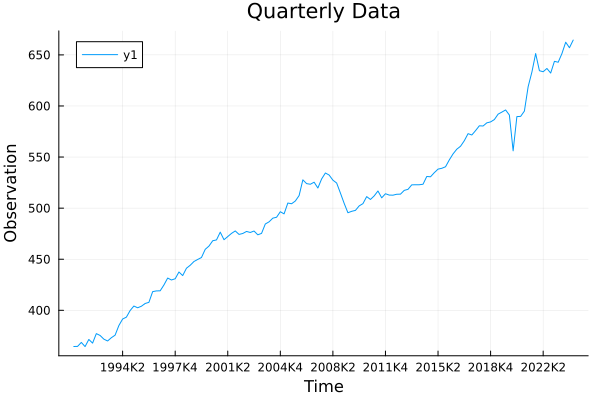

In [23]:
y = data[:, 2]
# y = log.(y)
dates = data[:, 1]

# Plot the data
plot(dates,y, title="Quarterly Data", xlabel="Time", ylabel="Observation")

## Apply HP and Butterworth filters

In [24]:
# HP filter with λ = 1600
hp = HP(y, 1600)
println(size(hp))

# Boosted HP filter with baysian-type information criterion (BIC)
bHP_bic = bHP(y, 1600, Criterion="BIC")


(134,)
Number of iterations = 9


134-element Vector{Float64}:
 363.91753887127896
 365.04573919203386
 366.18629365625526
 367.35612171951163
 368.59024267998797
 369.9101825577876
 371.35455102736825
 372.94962390342613
 374.7519616305662
 376.8279461609129
   ⋮
 632.107717239681
 636.45110191126
 640.6432455501714
 644.7581397911188
 648.8268005253216
 652.8782450573394
 656.9108069928593
 660.9163433188338
 664.9191043265388

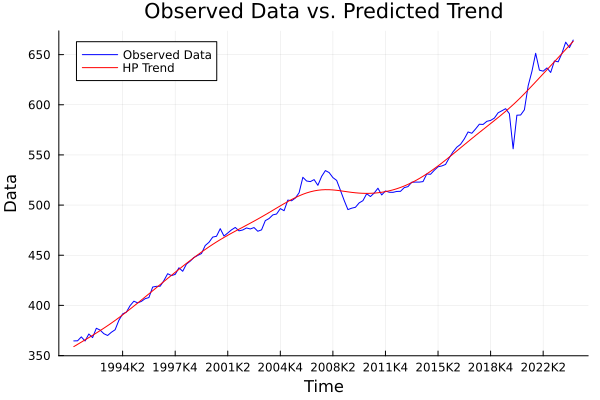

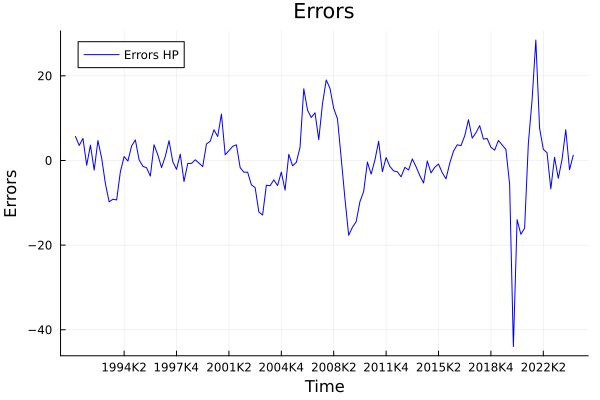

In [25]:






y_pred = hp


p = plot(dates, y, label="Observed Data", color=:blue)
plot!(p, dates, hp, label="HP Trend", color=:red)
xlabel!("Time")
ylabel!("Data")
title!("Observed Data vs. Predicted Trend")
# plot!(p, dates, bHP_bic, label="Boosted HP Trend (BIC)", color=:green)
# plot!(p, dates, bHP_adf, label="Boosted HP Trend (ADF)", color=:purple)

display(p)


cycle_hp = y .- hp
cycle_hp_bic = y .- bHP_bic
# errors3 = y .- bHP_adf


p_error = plot(dates, cycle_hp, label="Errors HP", color=:blue)
# plot!(p_error, dates, cycle_hp_bic, label="Errors (BIC)", color=:green)
# plot!(p_error, dates, errors3, label="Errors (ADF)", color=:purple)
xlabel!("Time")
ylabel!("Errors")
title!("Errors")
display(p_error)


In [26]:
# import Pkg; Pkg.add("DSP")

In [27]:
using DSP  # For digital signal processing functions
using Plots  # For plotting (optional)



fs = 4  # Replace with the appropriate value for your data

N = 12  # Number of periods for the cutoff
fc = fs / N  # Cutoff frequency in the same units as fs

# Ensure the cutoff frequency is valid
if fc >= fs / 2
    error("Cutoff frequency must be less than half the sampling frequency")
end

# Define the filter order
order = 4  # Adjust as needed

# Design the Butterworth low-pass filter
responsetype = Lowpass(fc; fs=fs)
designmethod = Butterworth(order)
butter_filter = digitalfilter(responsetype, designmethod)

# Apply the filter to your data using filtfilt to avoid phase distortion
trend_butterworth = filtfilt(butter_filter, y)

# Output the size of the trend component
println(size(trend_butterworth))

# (Optional) Plot the original data and the extracted trend
plot(dates, y, label="Original Data")
plot!(dates, trend_butterworth, label="Trend (Butterworth Filtered)")

cycle_butterworth = y .- trend_butterworth


MethodError: MethodError: no method matching Lowpass(::Float64; fs::Int64)
This method may not support any kwargs.

Closest candidates are:
  Lowpass(::Real) got unsupported keyword argument "fs"
   @ DSP C:\Users\wrc938\.julia\packages\DSP\qzZ42\src\Filters\design.jl:255


## Load results from STMs

In [28]:
using JLD2

@load "states_harvey.jld2" alpha_mean alpha_lower alpha_upper

alpha_mean_harvey = alpha_mean
alpha_lower_harvey = alpha_lower
alpha_upper_harvey = alpha_upper

@load "states_harvey_in_kim.jld2" alpha_mean alpha_lower alpha_upper

alpha_mean_harvey_in_kim = alpha_mean
alpha_lower_harvey_in_kim = alpha_lower
alpha_upper_harvey_in_kim = alpha_upper

@load "states_kim_nelson.jld2" alpha_mean alpha_lower alpha_upper

alpha_mean_kim_nelson = alpha_mean
alpha_lower_kim_nelson = alpha_lower
alpha_upper_kim_nelson = alpha_upper

@load "states_harvey_filter.jld2" alpha_mean alpha_lower alpha_upper

alpha_mean_harvey_filter = alpha_mean
alpha_lower_harvey_filter = alpha_lower
alpha_upper_harvey_filter = alpha_upper



ArgumentError: ArgumentError: Package JLD2 not found in current path.
- Run `import Pkg; Pkg.add("JLD2")` to install the JLD2 package.

## Plot cycle

In [29]:


p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 5], label="Linear STM",
        ribbon=(alpha_mean_harvey[:, 5] .- alpha_lower_harvey[:, 5],
                alpha_upper_harvey[:, 5] .- alpha_mean_harvey[:, 5]),
        fillalpha=0.1, color=:blue)

# Plot Harvey in Kim estimates with credible intervals
plot!(p, dates, alpha_mean_harvey_in_kim[:, 5], label="Switching w. 2nd order cycle",
        ribbon=(alpha_mean_harvey_in_kim[:, 5] .- alpha_lower_harvey_in_kim[:, 5],
                alpha_upper_harvey_in_kim[:, 5] .- alpha_mean_harvey_in_kim[:, 5]),
        fillalpha=0.1, color=:green)

# Plot Kim Nelson estimates with credible intervals
plot!(p, dates, alpha_mean_kim_nelson[:, 3], label="Switching with AR2 cycle",
        ribbon=(alpha_mean_kim_nelson[:, 3] .- alpha_lower_kim_nelson[:, 3],
                alpha_upper_kim_nelson[:, 3] .- alpha_mean_kim_nelson[:, 3]),
        fillalpha=0.1, color=:red)

# # Plot Harvey Filter estimates with credible intervals
# plot!(p, dates, alpha_mean_harvey_filter[:, 5], label="Harvey Filter Estimate",
#         ribbon=(alpha_mean_harvey_filter[:, 5] .- alpha_lower_harvey_filter[:, 5],
#                 alpha_upper_harvey_filter[:, 5] .- alpha_mean_harvey_filter[:, 5]),
#         fillalpha=0.1, color=:purple)


# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

#save
savefig(p, "Estimated_Cycles_from_SSMs.pdf")



UndefVarError: UndefVarError: `alpha_mean_harvey` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [30]:


p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 5], label="Linear STM",
        ribbon=(alpha_mean_harvey[:, 5] .- alpha_lower_harvey[:, 5],
                alpha_upper_harvey[:, 5] .- alpha_mean_harvey[:, 5]),
        fillalpha=0.1, color=:blue)

# # Plot Harvey filtered estimates with credible intervals
# plot!(p, dates, alpha_mean_harvey_filter[:, 5], label="Harvey Filter Estimate", color=:purple)
#         # ribbon=(alpha_mean_harvey_filter[:, 5] .- alpha_lower_harvey_filter[:, 5],
#         #         alpha_upper_harvey_filter[:, 5] .- alpha_mean_harvey_filter[:, 5]),
#         # fillalpha=0.1, color=:purple)

# Plot HP-filtered data
plot!(p, dates, cycle_hp, label="HP", color=:red)

# Plot Butterworth-filtered data
plot!(p, dates, cycle_butterworth, label="Butterworth", color=:green)

# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

savefig(p, "Estimated_Linear_Cycles.pdf")



UndefVarError: UndefVarError: `alpha_mean_harvey` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### Plot trend and real data

In [31]:


p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 1], label="Linear STM",
        ribbon=(alpha_mean_harvey[:, 1] .- alpha_lower_harvey[:, 1],
                alpha_upper_harvey[:, 1] .- alpha_mean_harvey[:, 1]),
        fillalpha=0.1, color=:blue)

# Plot Harvey in Kim estimates with credible intervals
plot!(p, dates, alpha_mean_harvey_in_kim[:, 1], label="Switching w. 2nd order cycle",
        ribbon=(alpha_mean_harvey_in_kim[:, 1] .- alpha_lower_harvey_in_kim[:, 1],
                alpha_upper_harvey_in_kim[:, 1] .- alpha_mean_harvey_in_kim[:, 1]),
        fillalpha=0.1, color=:green)

# Plot Kim Nelson estimates with credible intervals
plot!(p, dates, alpha_mean_kim_nelson[:, 1], label="Switching w. AR2 cycle",
        ribbon=(alpha_mean_kim_nelson[:, 1] .- alpha_lower_kim_nelson[:, 1],
                alpha_upper_kim_nelson[:, 1] .- alpha_mean_kim_nelson[:, 1]),
        fillalpha=0.1, color=:red)

plot!(p, dates, y, label="Real GDP", color=:purple)


# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

savefig(p, "Estimated_Trends_from_SSMs.pdf")



UndefVarError: UndefVarError: `alpha_mean_harvey` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [32]:


p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 1], label="Linear STM",
        ribbon=(alpha_mean_harvey[:, 1] .- alpha_lower_harvey[:, 1],
                alpha_upper_harvey[:, 1] .- alpha_mean_harvey[:, 1]),
        fillalpha=0.1, color=:blue)

# # Plot Harvey filtered estimates with credible intervals
# plot!(p, dates, alpha_mean_harvey_filter[:, 1], label="Harvey Filter Estimate", color=:purple)
#         # ribbon=(alpha_mean_harvey_filter[:, 1] .- alpha_lower_harvey_filter[:, 1],
#         #         alpha_upper_harvey_filter[:, 1] .- alpha_mean_harvey_filter[:, 1]),
#         # fillalpha=0.1, color=:purple)

# Plot HP-filtered data
plot!(p, dates, hp, label="HP", color=:red)

# Plot Butterworth-filtered data
plot!(p, dates, trend_butterworth, label="Butterworth", color=:green)


plot!(p, dates, y, label="Real GDP", color=:purple)

# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

savefig(p, "Estimated_Linear_Trends.pdf")


UndefVarError: UndefVarError: `alpha_mean_harvey` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### Trend deviaten from real data

In [33]:
p = plot(xlabel="Time", ylabel="pct.")

# Plot Harvey estimates with credible intervals
plot!(p, dates, (y .- alpha_mean_harvey[:, 1]) ./ alpha_mean_harvey[:, 1] *100, label="Linear STM",
      ribbon=((y .- alpha_mean_harvey[:, 1]) ./ alpha_mean_harvey[:, 1]*100 .- (y .- alpha_lower_harvey[:, 1]) ./ alpha_lower_harvey[:, 1]*100,
              (y .- alpha_upper_harvey[:, 1]) ./ alpha_upper_harvey[:, 1]*100 .- (y .- alpha_mean_harvey[:, 1]) ./ alpha_mean_harvey[:, 1]*100),
      fillalpha=0.1, color=:blue)

# Plot Harvey in Kim estimates with credible intervals
plot!(p, dates, (y .- alpha_mean_harvey_in_kim[:, 1]) ./ alpha_mean_harvey_in_kim[:, 1]*100, label="Switching w. 2nd order cycle",
      ribbon=((y .- alpha_mean_harvey_in_kim[:, 1]) ./ alpha_mean_harvey_in_kim[:, 1]*100 .- (y .- alpha_lower_harvey_in_kim[:, 1]) ./ alpha_lower_harvey_in_kim[:, 1]*100,
              (y .- alpha_upper_harvey_in_kim[:, 1]) ./ alpha_upper_harvey_in_kim[:, 1]*100 .- (y .- alpha_mean_harvey_in_kim[:, 1]) ./ alpha_mean_harvey_in_kim[:, 1]*100),
      fillalpha=0.1, color=:green)

# Plot Kim Nelson estimates with credible intervals
plot!(p, dates, (y .- alpha_mean_kim_nelson[:, 1]) ./ alpha_mean_kim_nelson[:, 1]*100, label="Switching w. AR2 cycle",
      ribbon=((y .- alpha_mean_kim_nelson[:, 1]) ./ alpha_mean_kim_nelson[:, 1]*100 .- (y .- alpha_lower_kim_nelson[:, 1]) ./ alpha_lower_kim_nelson[:, 1]*100,
              (y .- alpha_upper_kim_nelson[:, 1]) ./ alpha_upper_kim_nelson[:, 1]*100 .- (y .- alpha_mean_kim_nelson[:, 1]) ./ alpha_mean_kim_nelson[:, 1]*100),
      fillalpha=0.1, color=:red)

# # Plot reference line for Real GDP at zero deviation
# plot!(p, dates, 0 .* y, label="Real GDP", color=:purple)

# Adjust legend position if necessary
plot!(p, legend=:topleft)

# Display the plot
display(p)

# Save the plot as a PDF
savefig(p, "cycles.pdf")


UndefVarError: UndefVarError: `alpha_mean_harvey` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### Recesion probability switching models

In [34]:
@load "p_res_mean_harvey_in_kim.jld2" p_res_mean

p_res_mean_harvey_in_kim = p_res_mean

@load "p_res_mean_kim_nelson.jld2" p_res_mean

p_res_mean_kim_nelson = p_res_mean

LoadError: LoadError: UndefVarError: `@load` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
in expression starting at c:\Users\wrc938\OneDrive - University of Copenhagen\Økonomi\9. semester\Empirical macro\State-Space-Model-Estimation-1\results\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X26sZmlsZQ==.jl:1

In [35]:

p = plot(xlabel="Time", ylabel="p(recesion|y)")

plot!(p, dates, p_res_mean_harvey_in_kim, label="2nd order cycle", color=:green)
plot!(p, dates, p_res_mean_kim_nelson, label="AR2 cycle", color=:red)

display(p)

savefig(p, "p_recesion.pdf")

UndefVarError: UndefVarError: `p_res_mean_harvey_in_kim` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### Smoothed vs Filtered Harvey

In [36]:
# plot harvey filtered and harvey
#cycle
p = plot(xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 5], label="Smoothed Estimates",
        ribbon=(alpha_mean_harvey[:, 5] .- alpha_lower_harvey[:, 5],
                alpha_upper_harvey[:, 5] .- alpha_mean_harvey[:, 5]),
        fillalpha=0.1, color=:blue)

# Plot Harvey Filter estimates with credible intervals
plot!(p, dates, alpha_mean_harvey_filter[:, 5], label="Filtered Estimates",
        ribbon=(alpha_mean_harvey_filter[:, 5] .- alpha_lower_harvey_filter[:, 5],
                alpha_upper_harvey_filter[:, 5] .- alpha_mean_harvey_filter[:, 5]),
        fillalpha=0.1, color=:purple)

display(p)

savefig(p, "cycle_smoothvfiltered.pdf")

#trend
p = plot( xlabel="Time", ylabel="Real GDP 2020 prices bill.DKK")

# Plot Harvey estimates with credible intervals
plot!(p, dates, alpha_mean_harvey[:, 1], label="Smoothed Estimate",
        ribbon=(alpha_mean_harvey[:, 1] .- alpha_lower_harvey[:, 1],
                alpha_upper_harvey[:, 1] .- alpha_mean_harvey[:, 1]),
        fillalpha=0.1, color=:blue)

# Plot Harvey Filter estimates with credible intervals
plot!(p, dates, alpha_mean_harvey_filter[:, 1], label="Filtered Estimates",
        ribbon=(alpha_mean_harvey_filter[:, 1] .- alpha_lower_harvey_filter[:, 1],
                alpha_upper_harvey_filter[:, 1] .- alpha_mean_harvey_filter[:, 1]),
        fillalpha=0.1, color=:purple)

display(p)

savefig(p, "trend_smoothvfiltered.pdf")


UndefVarError: UndefVarError: `alpha_mean_harvey` not defined in `Main`
Suggestion: check for spelling errors or missing imports.